In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('../spam_ham_dataset.csv')

In [9]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


## text cleaning

In [11]:
#pip install nltk
#LancasterStemmer, SnowballStemmer
#Lemmatization

import re
import string
from nltk.stem import PorterStemmer
st=PorterStemmer()

def clean_text(text):
    #lower whole text
    text=text.lower()
    #remove digits
    text=re.sub(r'\d+','',text)
    #remove punctuations
    text=text.translate(str.maketrans('','',string.punctuation))
    #removing extra space from beginning and ending of text
    text=text.strip()
    text=text.replace('subject','').strip()
    text=' '.join([st.stem(word) for word in text.split()])
    return text

In [13]:
df['clean_text']=df['text'].apply(clean_text)

In [14]:
df.drop('label',axis=1,inplace=True)
df

,text,label_num,clean_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter thi is a follow up to the...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom for januari see attach file hplnol xl ...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho we re around to that mos...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop window offic cheap main trend abas d...
4,Subject: re : indian springs\r\nthis deal is t...,0,re indian spring thi deal is to book the teco ...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,put the on the ft the transport volum decreas ...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,and follow nom hpl can t take the extra mmcf d...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,calpin daili ga nomin juli as i mention earlie...
5169,Subject: industrial worksheets for august 2000...,0,industri worksheet for august activ attach are...


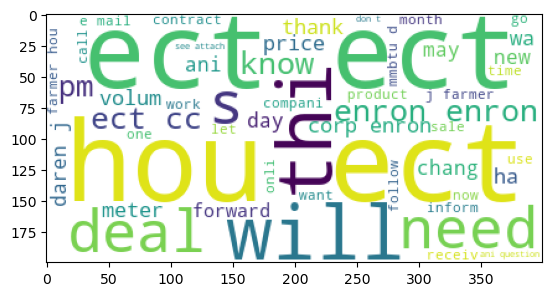

In [15]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', max_words=50).generate(df['clean_text'].str.cat())

plt.imshow(wc)
plt.show()

## Vectorization

In [19]:
#Term Frequency - Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer=TfidfVectorizer(stop_words='english')

In [ ]:
#stop words: am, an, any, are, been, our, into, i

In [23]:
tfidf=vectorizer.fit_transform(['i like apples','i like oranges', 'i like apples and oranges'])

pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names_out())

,apples,like,oranges
0,0.789807,0.613356,0.000000
1,0.000000,0.613356,0.789807
2,0.619805,0.481334,0.619805


## Split input/ouput

In [25]:
X=vectorizer.fit_transform(df['clean_text'])
y=df['label_num']

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

## Model

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
nb=MultinomialNB()

In [35]:
nb.fit(X_train,y_train)

MultinomialNB()

In [37]:
y_pred=nb.predict(X_test)

## Evaluation

In [39]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       740
           1       1.00      0.76      0.86       295

    accuracy                           0.93      1035
   macro avg       0.95      0.88      0.91      1035
weighted avg       0.94      0.93      0.93      1035



## Small demo interface

In [43]:
# predict new email 

def predict_email(text):
    cleaned=clean_text(text)
    vectorized=vectorizer.transform([cleaned])
    pred=nb.predict(vectorized)[0]
    print(pred)
    if pred==1:
        print('This seems like a Spam Email')
    else:
        print('This seems like a Genuine Email')

In [59]:
example_text='Hello, Hope this email finds you well'
predict_email(example_text)

0
This seems like a Genuine Email


In [55]:
example_text1='This email is auto generated by computer do not reply'
predict_email(example_text1)

1
This seems like a Spam Email
